In [1]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
tf.logging.set_verbosity(tf.logging.ERROR)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mnist = input_data.read_data_sets("data/mnist", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting data/mnist/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting data/mnist/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/mnist/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/mnist/t10k-labels-idx1-ubyte.gz


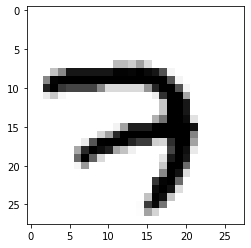

In [3]:
img1 = mnist.train.images[0].reshape(28, 28)
plt.imshow(img1, cmap='Greys')

In [4]:
num_input = 784
num_hidden1 = 512
num_hidden2 = 256
num_hidden3 = 128
num_output = 10

In [5]:
with tf.name_scope('input'):
    X = tf.placeholder("float", [None, num_input])
with tf.name_scope('output'):
    Y = tf.placeholder("float", [None, num_output])

In [6]:
with tf.name_scope('weights'):
    weights = {
        'w1': tf.Variable(tf.truncated_normal([num_input, num_hidden1], stddev=0.1), name='weight_1'),
        'w2': tf.Variable(tf.truncated_normal([num_hidden1, num_hidden2], stddev=0.1), name='weight_2'),
        'w3': tf.Variable(tf.truncated_normal([num_hidden2, num_hidden3], stddev=0.1), name='weight_3'),
        'out': tf.Variable(tf.truncated_normal([num_hidden3, num_output], stddev=0.1), name='weight_4'),
    }
    
with tf.name_scope('biases'):
    biases = {
        'b1': tf.Variable(tf.constant(0.1, shape=[num_hidden1]), name='bias_1'),
        'b2': tf.Variable(tf.constant(0.1, shape=[num_hidden2]), name='bias_2'),
        'b3': tf.Variable(tf.constant(0.1, shape=[num_hidden3]), name='bias_3'),
        'b4': tf.Variable(tf.constant(0.1, shape=[num_output]), name='bias_4'),
    }

In [10]:
with tf.name_scope('Model'):
    with tf.name_scope('layer1'):
        layer_1 = tf.nn.relu(tf.add(tf.matmul(X, weights['w1']), biases['b1']))
    with tf.name_scope('layer2'):
        layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['w2']), biases['b2']))
    with tf.name_scope('layer3'):
        layer_3 = tf.nn.relu(tf.add(tf.matmul(layer_2, weights['w3']), biases['b3'])) 
        
    with tf.name_scope('output_layer'):
        y_hat = tf.nn.softmax(tf.matmul(layer_3, weights['out']) + biases['b4'], axis=1)

In [11]:
with tf.name_scope('Loss'):
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_hat, labels=Y))

In [12]:
learning_rate = 1e-4
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

In [13]:
with tf.name_scope('Accuracy'):
    predicted_digit = tf.argmax(y_hat, 1)
    actual_digit = tf.argmax(Y, 1)
    
    correct_pred = tf.equal(predicted_digit, actual_digit)
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [14]:
tf.summary.scalar("Accuracy", accuracy)
tf.summary.scalar("Loss", loss)
merge_summary = tf.summary.merge_all()

In [15]:
init = tf.global_variables_initializer()

num_iterations = 1000
batch_size = 128

with tf.Session() as sess:
    sess.run(init)
    summary_writer = tf.summary.FileWriter('./graphs', graph=tf.get_default_graph())
    
    for i in range(num_iterations):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        sess.run(optimizer, feed_dict={X: batch_x, Y: batch_y})
        
        if i % 100 == 0:
            batch_loss, batch_accuracy,summary = sess.run(
                [loss, accuracy, merge_summary],
                feed_dict={X: batch_x, Y: batch_y}
                )
            #store all the summaries    
            summary_writer.add_summary(summary, i)
            print('Iteration: {}, Loss: {}, Accuracy: {}'.format(i,batch_loss,batch_accuracy))

Iteration: 0, Loss: 2.294802665710449, Accuracy: 0.09375
Iteration: 100, Loss: 1.7893996238708496, Accuracy: 0.7578125
Iteration: 200, Loss: 1.6163229942321777, Accuracy: 0.8828125
Iteration: 300, Loss: 1.5764753818511963, Accuracy: 0.890625
Iteration: 400, Loss: 1.6022251844406128, Accuracy: 0.890625
Iteration: 500, Loss: 1.5491969585418701, Accuracy: 0.921875
Iteration: 600, Loss: 1.5382153987884521, Accuracy: 0.9453125
Iteration: 700, Loss: 1.5349748134613037, Accuracy: 0.9453125
Iteration: 800, Loss: 1.557727575302124, Accuracy: 0.90625
Iteration: 900, Loss: 1.495070219039917, Accuracy: 0.96875
